# K-Nearest Neighbors Algorithm (Faiss Vector Database)

Uses a vector database.
https://faiss.ai/

Tutorial: https://github.com/facebookresearch/faiss/wiki/Getting-started

In [20]:
!apt install libomp-dev

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [21]:
%%capture
!pip install faiss-cpu

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import faiss
%matplotlib inline

In [23]:
index = faiss.IndexFlatL2(2)
index

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7f1c8c040de0> >

In [42]:
def plot_current_points():
  num_vectors = index.ntotal
  vecs = index.reconstruct_batch(np.arange(num_vectors))
  plt.scatter(vecs[:, 0], vecs[:, 1], color='black')
  print('Points:', num_vectors)

# Adding/Removing Data

Vectors can be added one by one (or batch if desired).

In [43]:
def index_add_random_data(n):
  data = 10 * np.random.rand(n, 2)
  index.add(data)

Use these two cells to add/remove data and then execute the queries.

In [44]:
index_add_random_data(100)

In [45]:
before = index.ntotal
index.remove_ids(np.arange(0, index.ntotal, 5))

print(before, '->', index.ntotal)

280 -> 224


Points: 224


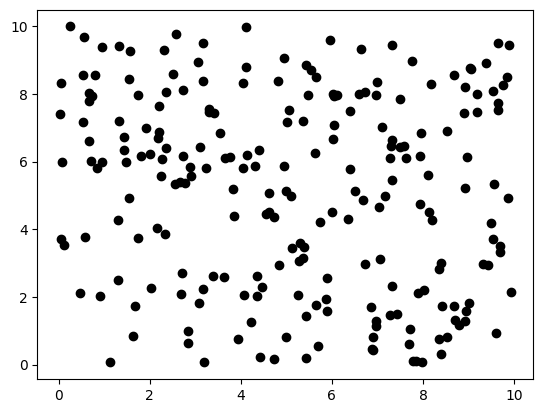

In [46]:
plot_current_points()

# Querying Data

In [51]:
def execute_query(queries, k):
  plot_current_points()

  dist, indices, vecs = index.search_and_reconstruct(np.array(queries), k)

  for x, y in queries:
    plt.scatter(x, y, color='red')

  for points in vecs:
    for x, y in points:
      plt.scatter(x, y, color='lightblue')

Points: 224


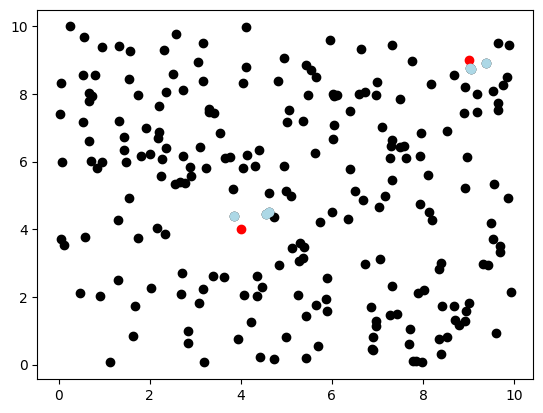

In [52]:
execute_query([[4, 4], [9, 9]], 3)

Points: 224


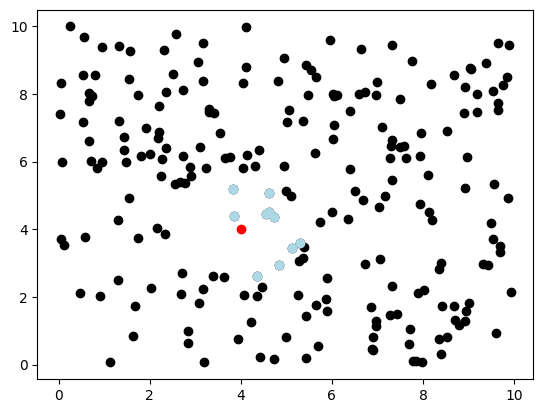

In [53]:
execute_query([[4, 4]], 10)

Points: 224


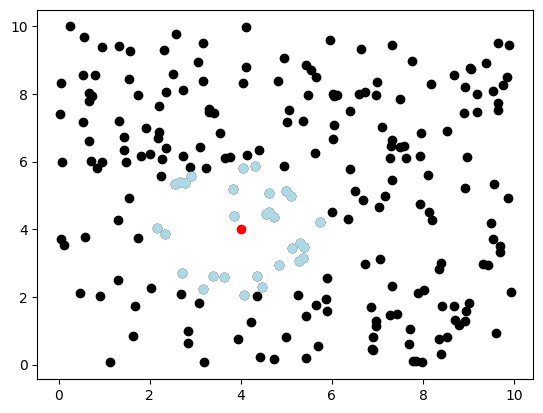

In [54]:
execute_query([[4, 4]], 30)

Points: 224


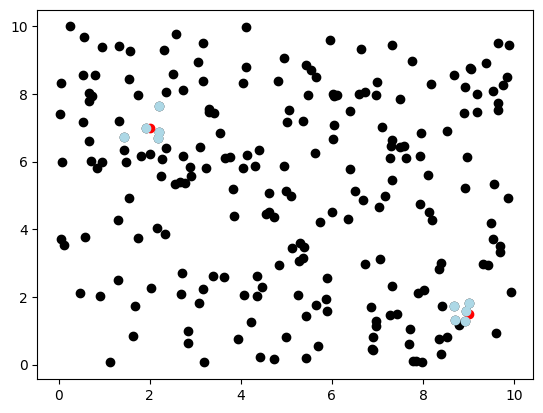

In [55]:
execute_query([[9, 1.5], [2, 7]], 5)